# Final 08/02/2022
---

### índice

- [Resolución punto a](#Resolución-punto-a)
- [Resolución punto b](#Resolución-punto-b)
- [Otro tema](#Otro-tema)
  - [Resolución](#Resolución-a-manopla-(creo-que-está-bien):)
  - [Verificación A B C D](#Verificación-A-B-C-D)
- [Pregunta oral: Mejorar ts y sobreimpulso](#Pregunta-oral:-Mejorar-ts-y-sobreimpulso)


![final2022-02-08.png](../images/final2022-02-08.png)

---

### Resolución punto a
---

![soluc_final2022-02-08_a1.jpeg](../images/soluc_final2022-02-08_a1.jpeg)
![soluc_final2022-02-08_a2.jpeg](../images/soluc_final2022-02-08_a2.jpeg)
![soluc_final2022-02-08_a3.jpeg](../images/soluc_final2022-02-08_a3.jpeg)

### Resolución punto b
---

NO se hacerlo...

## Otro tema
---

![final2022-02-08_2.jpeg](../images/final2022-02-08_2.jpeg)

El ej 1 era ese cto y me pedía encontrar la transferencia donde Vi es la entrada y Vo la salida, dibujar diagrama en bloque, nombrar cuales serían las variables de estado (que en el dibujo ya estaban marcadas como x1 y x2, pero quería que pongamos que variable eléctrica era), encontrar A B C D, diagonalizar y por último comprobar la diagonalizacion

---

### Resolución a manopla (creo que está bien):

![soluc_final2022-02-08_c.jpeg](../images/soluc_final2022-02-08_c.jpeg)

Para resolverlo en Octave voy a calcular la transferencia para luego transformar a ecuaciones de estado.
La verdad no se si está bien porque Octave pudo haber elegido cualquier variable de estado...debe haber una forma de comprobar eso que no conozco

In [7]:
pkg load symbolic control signal

syms s;
C = 1, R = 1;        % asigno valores a los componentes

Z1 = 1/(s*C);        % sería la impedancia de C
Z2 = (1/(s*C)) + R;  % la impedancia de R en serie con C
Z3 = Z1;
Z4 = (2/(s*C)) + R;  % la impedancia de R en serie con C2 = C/2

% Ahora utilizo la ecuación del amplificador inversor
% para encontrar las 2 transferencias 'asociadas a los opamps'
T1 = -Z1/Z2;
T2 = -Z3/Z4;

% Encuentro la transferencia total
T = simplify(T1*T2)

C =  1
T = (sym)

         1       
  ───────────────
  (s + 1)⋅(s + 2)



In [8]:
% Ahora calculo las matrices A, B, C, D.
%------------------------------------------------

% extraigo numerado y denominador en forma simbólica
[num, den] = numden(T);

% extraigo los valores de los coeficientes 
num = sym2poly(num)
den = sym2poly(den)

% calculo las matrices
[A, B, C, D] = tf2ss(num, den)

num =  1
den =

   1   3   2

A =

   0  -2
   1  -3

B =

  -1
   0

C =

   0  -1

D = 0


### Verificación A B C D
---

Verifico que las matrices calculadas manualmente den la misma Transferencia

In [33]:
R = 1;         % ressitencia
C = 1;         % capacidad

% Matrices obtenidas
A = [-1/(R*C) 0; -1/(R*C) -2/(R*C)]
B = [-1/C; 0]
C = [0 1]
D = 0

[num, den] = ss2tf(A, B, C, D);
H = tf(num, den);
%[ceros polos K] = zpkdata(H, 'v');
[ceros polos K] = tf2zp(num, den)   %cualquiera de las 2 opciones funciona

A =

  -1   0
  -1  -2

B =

  -1
   0

C =

   0   1

D = 0
ceros = [](0x1)
polos =

  -2
  -1

K =  1.0000


Se ve que los polos y el factor de ganancia son los mismos.

## Pregunta oral: Mejorar ts y sobreimpulso
---

Dadas las ecuaciones:
- $t_s = 4/\sigma_d$
- $M_p = 1 + e^{-\frac{\pi \xi}{ \sqrt{1 - \xi^2}}}$

para mejorar ts (disminuir su valor), se debe aumentar $\sigma_d$ que es la parte real de los polos.
Luego para mejorar el sobreimpulso Mp (disminuir su valor). Se puede ver en la ecuación que debe aumentar el valor de $\xi$, para ello despejo de $\sigma_d$:

  $$ \sigma_d = \xi \, \omega_n $$
  $$ \xi = \frac{\sigma_d}{\omega_n} $$
  
Por lo tanto hay 2 opciones:
- a. Disminuir el valor de $\omega_n$, con $\sigma_d = cte$.
    Dado que $\omega_n$ es el módulo de los polos y $sigma_d$ es la parte real, se debe disminuir el valor de la parte imaginaria de los polos. O sea, correr los polos en linea recta hacia el eje imaginario.
- b. Aumentar el valor de $\sigma_d$, con $\omega_n = cte$.
    Por la misma observación del punto anterior para dejar fijo $\omega_n$, se deben mover los polos manteniendo el radio fijo hacia el eje real.
    
De las 2 opciones hay que elegir la b para mejorar ambos parámetros simultáneamente (disminuir ts y Mp). 
Para lograrlo se puede solo aumentar $\xi$ en la ecuación genérica de segundo orden.

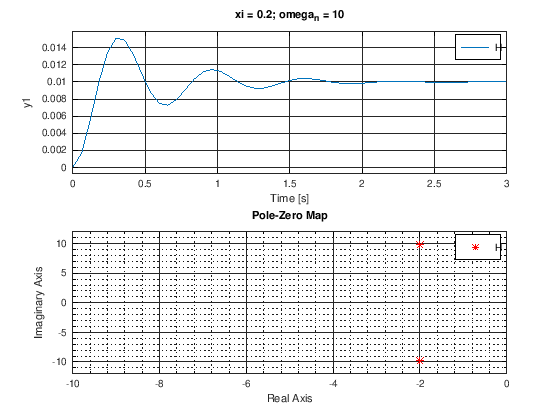

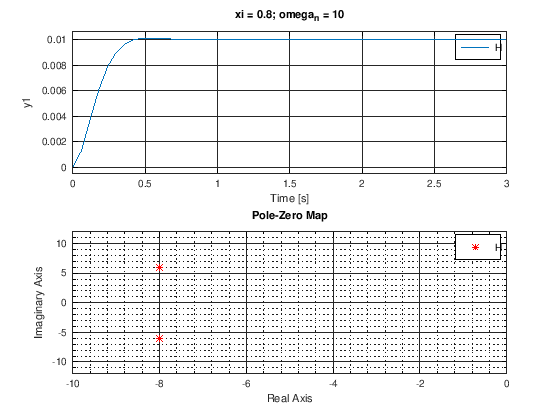

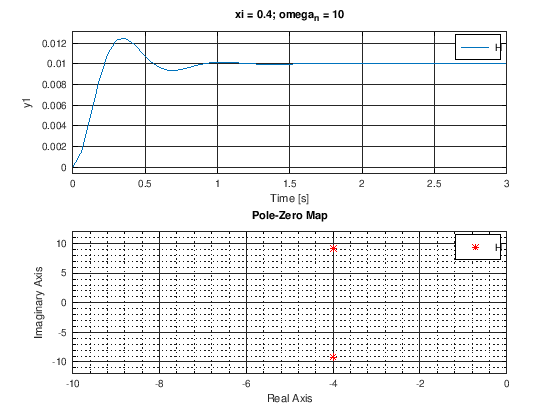

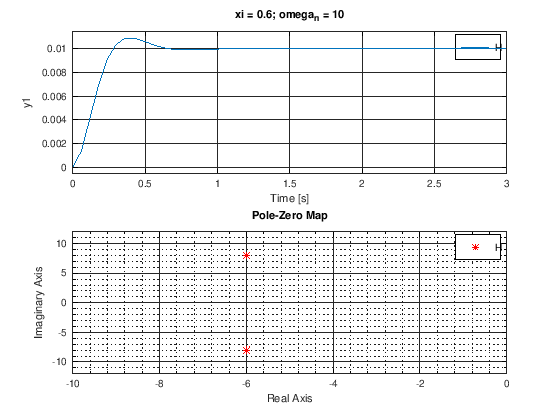

In [89]:
pkg load control signal symbolic

function H = xiOmegan(xi, omega_n)
    sigma_d = xi*omega_n;
    omega_d = omega_n*sqrt(1 - xi^2);
    p1 = -sigma_d + j*omega_d;
    p2 = -sigma_d - j*omega_d;
    polos = [p1 p2];
    H = zpk([], polos, 1);
endfunction

omega_n = 10;

for r = 1 : 4;
    xi = 0.2*r;
    titulo = sprintf("xi = %i; omega_n = %i", xi, omega_n);
    H = xiOmegan(xi, omega_n);
   
    F = figure();
    hold on
    subplot (2, 1, 1)
    step(H,3)
    F = title(titulo);
    subplot (2, 1, 2)
    pzmap(H,"*r")
    axis([-10 0 -12 12])
    grid minor
    hold off
endfor
